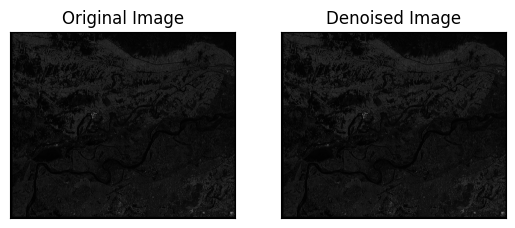

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

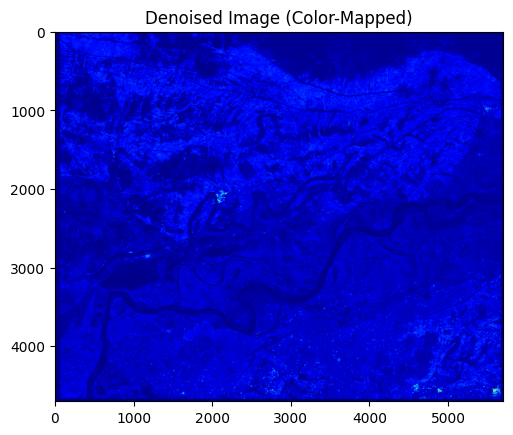

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [11]:
import numpy as np

def mse(image1, image2): return np.mean((image1 - image2) ** 2)

original_image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)


In [12]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9150987725297592


In [13]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 24
Denoised pixel value at (150, 150): 23


Original Image Amplitude (Magnitude):
[[ 4909.          1956.29225589  6769.31438291 ...  3524.26276675
   6769.31438291  1956.29225589]
 [ 1383.16380991  8050.60354489  1776.67962239 ...  4273.9611064
   1626.53536659 10435.72893065]
 [ 7438.97318799  6229.89952162  4716.12972355 ...  3695.93220797
   3805.4191975   1398.76202942]
 ...
 [ 2507.73279542   558.09556714  1703.11302859 ...  4713.87895357
   3649.67441539  4224.56611202]
 [ 7438.97318799  1398.76202942  3805.4191975  ...  1893.00685867
   4716.12972355  6229.89952162]
 [ 1383.16380991 10435.72893065  1626.53536659 ...  3631.94692029
   1776.67962239  8050.60354489]]
Denoised Image Amplitude (Magnitude):
[[1995.         1930.14690466 1854.09408371 ... 1898.79013495
  1854.09408371 1930.14690466]
 [ 653.47704525 1191.07877082 1929.96260324 ...  887.98964742
   458.88528624  587.50023009]
 [ 384.20327855 1589.77329557  365.82139246 ...  798.41529818
   864.19221427 1146.42016584]
 ...
 [1825.67448766 1251.12460282  863.203083

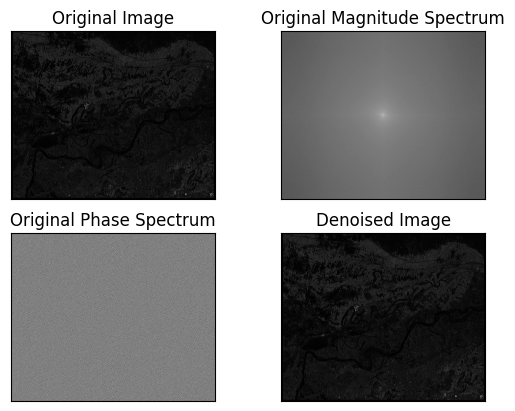

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r"/content/HH-ALPSRP249390550-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")